# Demo 1 - Comparing BCI pipelines with MOABB - Code based on this [tutorial](http://moabb.neurotechx.com/docs/auto_examples/advanced_examples/plot_statistical_analysis.html#sphx-glr-download-auto-examples-advanced-examples-plot-statistical-analysis-py) 

In [13]:
import matplotlib.pyplot as plt
from mne.decoding import CSP
from pyriemann.estimation import Covariances
from pyriemann.tangentspace import TangentSpace
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC

import moabb
from moabb import benchmark, set_log_level
from moabb.analysis.plotting import score_plot
import moabb.analysis.plotting as moabb_plt
from moabb.analysis.meta_analysis import (  # noqa: E501
    compute_dataset_statistics,
    find_significant_differences,
)
from moabb.datasets import BNCI2014_001, Zhou2016, Cho2017
from moabb.evaluations import CrossSessionEvaluation
from moabb.paradigms import LeftRightImagery

import seaborn as sns

moabb.set_log_level("info")
print(__doc__)


Automatically created module for IPython interactive environment


In [3]:
# pipelines to be compared

pipelines = {}

param_svm = {"kernel": ("linear", "rbf"), "C": [0.1, 1, 10]}
step_csp_svm = [
    ("cov", Covariances(estimator="lwf")),
    ("csp", CSP(6)),
    ("optsvm", GridSearchCV(SVC(), param_svm, cv=3)),
]
pipelines["CSP+optSVM"] = Pipeline(steps=step_csp_svm)


pipelines["CSP+LDA"] = make_pipeline(CSP(n_components=8), LDA())

pipelines["RG+LR"] = make_pipeline(Covariances(), TangentSpace(), LogisticRegression())

pipelines["CSP+LR"] = make_pipeline(CSP(n_components=8), LogisticRegression())

pipelines["RG+LDA"] = make_pipeline(Covariances(), TangentSpace(), LDA())


In [14]:
# evaluation on one dataset

paradigm = LeftRightImagery()
dataset = BNCI2014_001()
dataset.subject_list = dataset.subject_list[:4]
datasets = [dataset]
overwrite = True  # set to False if we want to use cached results
evaluation = CrossSessionEvaluation(
    paradigm=paradigm, datasets=datasets, suffix="stats", overwrite=overwrite
)

results = evaluation.process(pipelines)

2024-12-07 17:39:07,276 INFO MainThread moabb.evaluations.base Processing dataset: BNCI2014-001
BNCI2014-001-CrossSession:   0%|                                                     | 0/4 [00:00<?, ?it/s]/Users/marieconstance.corsi/anaconda3/envs/moabb_minischool/lib/python3.9/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  24 events (all good), 2 – 6 s, baseline off, ~4.1 MB, data loaded,
 'left_hand': 12
 'right_hand': 12>
  warn(f"warnEpochs {epochs}")
/Users/marieconstance.corsi/anaconda3/envs/moabb_minischool/lib/python3.9/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  24 events (all good), 2 – 6 s, baseline off, ~4.1 MB, data loaded,
 'left_hand': 12
 'right_hand': 12>
  warn(f"warnEpochs {epochs}")
/Users/marieconstance.corsi/anaconda3/envs/moabb_minischool/lib/python3.9/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  24 events (all good), 2 – 6 s, baseline off, ~4.1

2023-11-07 15:24:58,944 WARNING MainThread moabb.analysis.plotting Dataset names are too similar, turning off name shortening
/opt/anaconda3/envs/M2-MVA_MEEG_hands-on/lib/python3.10/site-packages/moabb/analysis/plotting.py:59: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sea.stripplot(


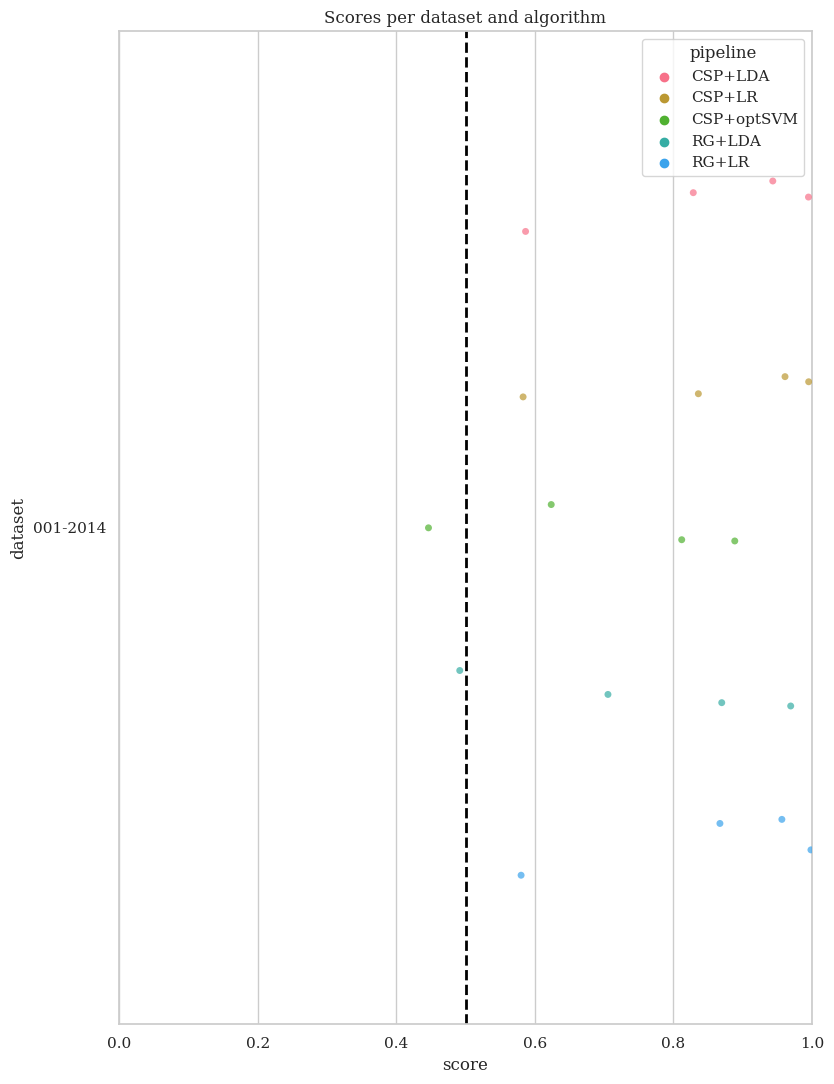

In [19]:
# plot comparison
fig = moabb_plt.score_plot(results)
plt.show()


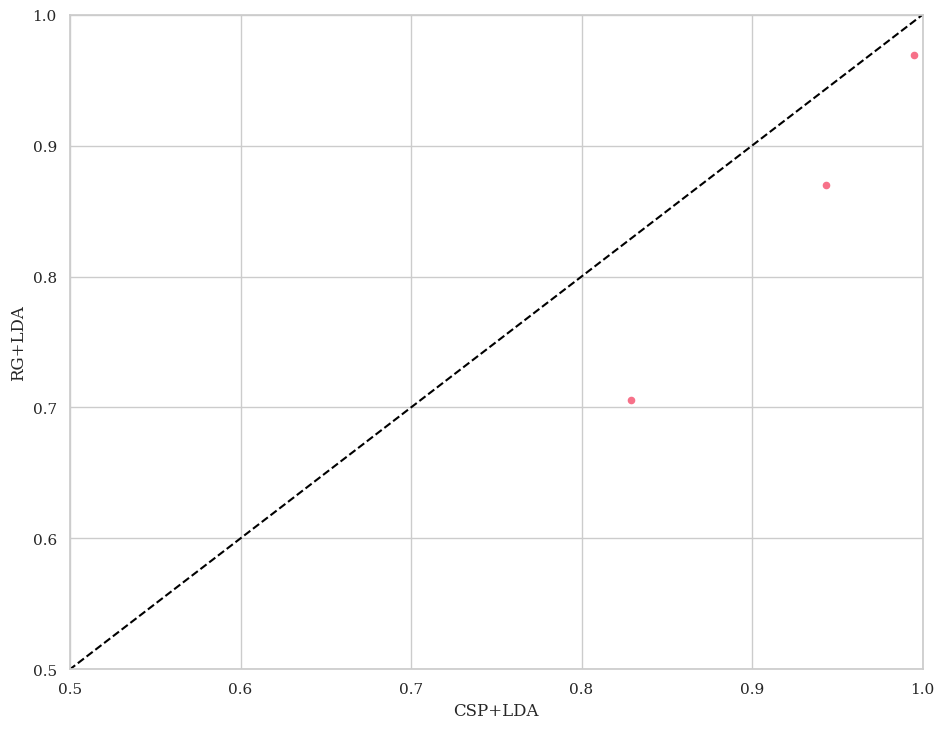

In [5]:
fig = moabb_plt.paired_plot(results, "CSP+LDA", "RG+LDA")
plt.show()

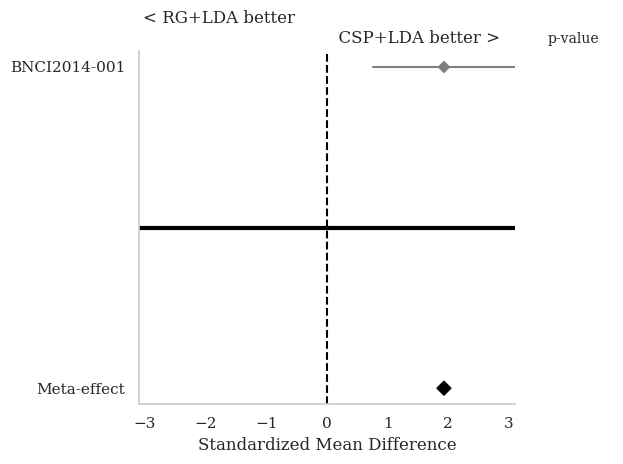

In [6]:
# plot statistical comparison
stats = compute_dataset_statistics(results)
P, T = find_significant_differences(stats)

fig = moabb_plt.meta_analysis_plot(stats, "CSP+LDA", "RG+LDA")
plt.show()

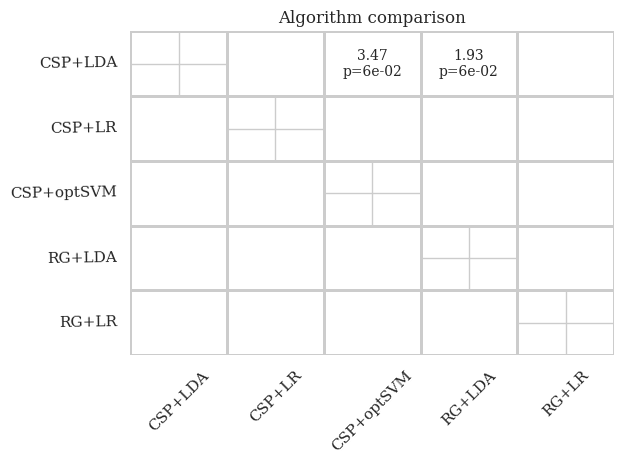

In [8]:
moabb_plt.summary_plot(P, T)
plt.show()

# Demo 2 - Benchmarking with different datasets

In [15]:
paradigm = LeftRightImagery()
subj = [1, 2, 3]
datasets = [BNCI2014_001(), Zhou2016()]
for d in datasets:
    d.subject_list = subj

overwrite = True  # set to False if we want to use cached results
evaluation = CrossSessionEvaluation(
    paradigm=paradigm, datasets=datasets, suffix="stats", overwrite=overwrite
)

results = evaluation.process(pipelines)

2024-12-07 17:40:14,107 INFO MainThread moabb.evaluations.base Processing dataset: BNCI2014-001
BNCI2014-001-CrossSession:   0%|                                                     | 0/3 [00:00<?, ?it/s]/Users/marieconstance.corsi/anaconda3/envs/moabb_minischool/lib/python3.9/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  24 events (all good), 2 – 6 s, baseline off, ~4.1 MB, data loaded,
 'left_hand': 12
 'right_hand': 12>
  warn(f"warnEpochs {epochs}")
/Users/marieconstance.corsi/anaconda3/envs/moabb_minischool/lib/python3.9/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  24 events (all good), 2 – 6 s, baseline off, ~4.1 MB, data loaded,
 'left_hand': 12
 'right_hand': 12>
  warn(f"warnEpochs {epochs}")
/Users/marieconstance.corsi/anaconda3/envs/moabb_minischool/lib/python3.9/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  24 events (all good), 2 – 6 s, baseline off, ~4.1

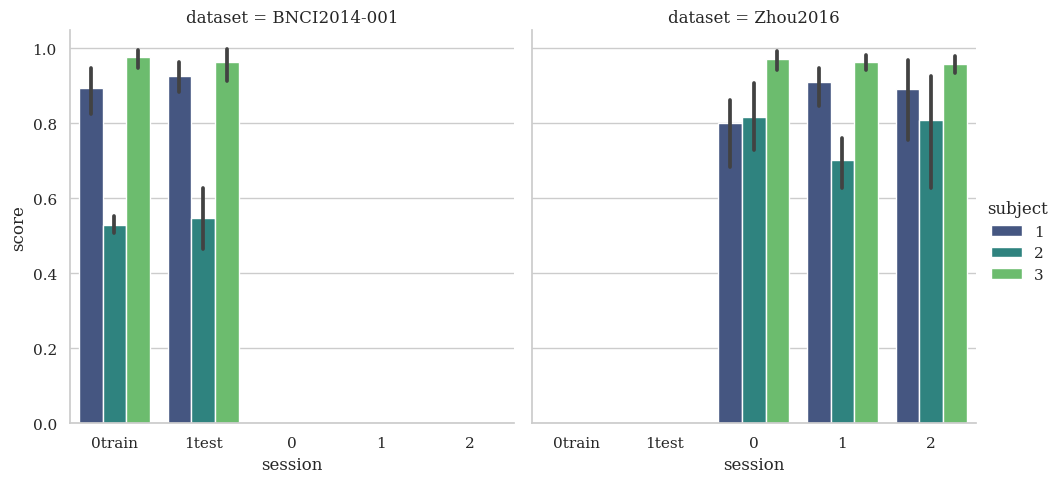

In [16]:

sns.catplot(
    data=results,
    x="session",
    y="score",
    hue="subject",
    col="dataset",
    kind="bar",
    palette="viridis",
)
plt.show()

2024-12-07 17:41:37,009 WARNING MainThread moabb.analysis.plotting Dataset names are too similar, turning off name shortening
/Users/marieconstance.corsi/anaconda3/envs/moabb_minischool/lib/python3.9/site-packages/moabb/analysis/plotting.py:70: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sea.stripplot(


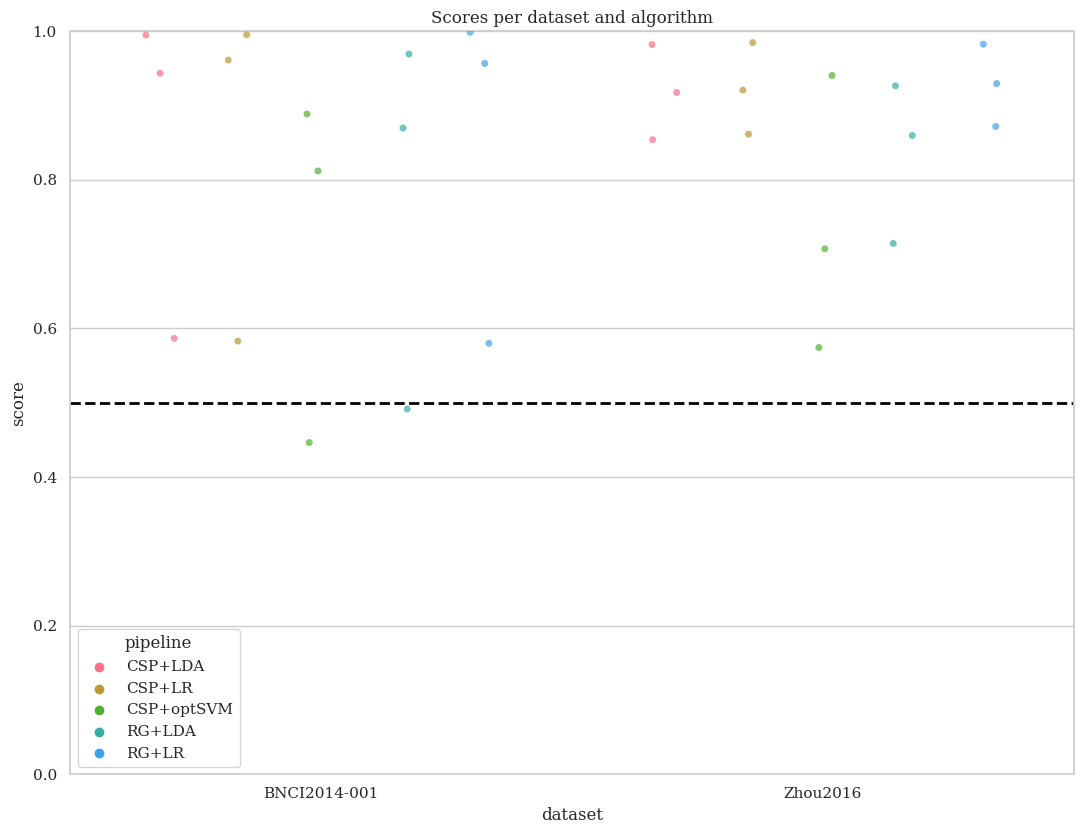

In [17]:
fig = moabb_plt.score_plot(results)
plt.show()

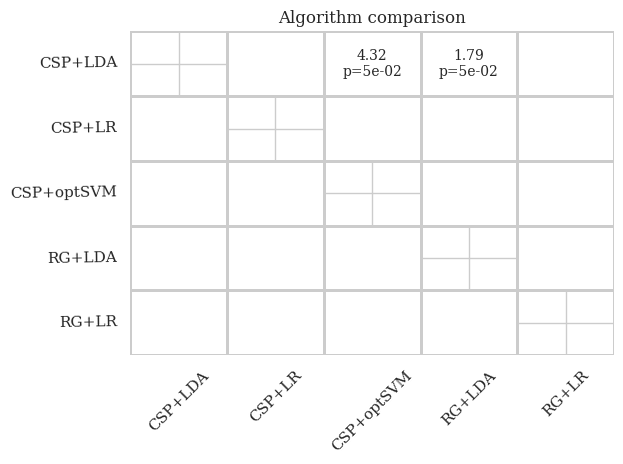

In [18]:
stats = compute_dataset_statistics(results)
P, T = find_significant_differences(stats)
moabb_plt.summary_plot(P, T)
plt.show()


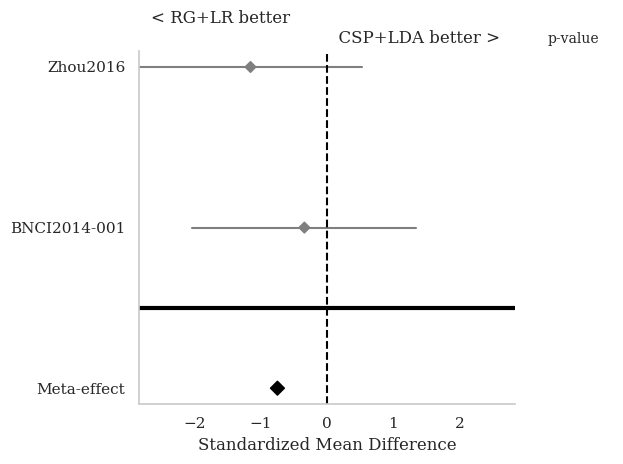

In [19]:
fig = moabb_plt.meta_analysis_plot(stats, "CSP+LDA", "RG+LR")
plt.show()